In [1]:
%matplotlib inline
import os
import shutil
import platform
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle as rect
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl


In [2]:
import os, sys
import flopy
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

import pandas as pd
import cartopy.crs as ccrs 
import flopy.utils.binaryfile as bf
import contextily as ctx
import fiona
import seaborn as sns
import pyemu
from pathlib import Path
import helpers
from shutil import copytree, ignore_patterns

In [3]:
import conda_scripts

In [4]:
owhm2 = r"C:\GSP\sv\model\SV_mod_V2_owhm2\master"

In [5]:
template_ws = "local_copy"

In [6]:
shutil.copy2('forward_run.py', template_ws)
import forward_run

loading forward_run.py from C:\GSP\sv\model\update_2024\scripts


In [7]:
dts = conda_scripts.utils.get_dates.get_dates()
ml = conda_scripts.sv_budget.load_sv_model.get_model(owhm2)

date range is 1969-12-31 00:00:00 to 2018-09-30 00:00:00


C:\rich_py\conda_scripts\conda_scripts\utils\get_dates.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.


Loaded ibound from arrays inside model_arrays
date range is 1969-12-31 00:00:00 to 2018-09-30 00:00:00
the start date is 12/1/1969
126569.41734971055 53725.53016727514


C:\rich_py\conda_scripts\conda_scripts\utils\get_dates.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.


In [8]:
_, mg = conda_scripts.arich_functions.get_flopy_model_spatial_reference('son')

126569.41734971055 53725.53016727514


C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.


In [9]:
sr = helpers.get_sr()

126569.41734971055 53725.53016727514


C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.


In [10]:
os.getcwd()

'C:\\GSP\\sv\\model\\update_2024\\scripts'

In [11]:
egpath = Path(".").absolute()
# while egpath.name != 'examples':
#     os.chdir('..')
#     egpath = Path(".").absolute()

model_ws = Path(owhm2).absolute()
tmp_path = Path(template_ws).absolute()

EXE_DIR = Path("..","bin").absolute()
if "window" in platform.platform().lower():
    EXE_DIR = Path(EXE_DIR,"win")
elif "darwin" in platform.platform().lower() or "macos" in platform.platform().lower():
    EXE_DIR = Path(EXE_DIR,"mac")
else:
    EXE_DIR = Path(EXE_DIR,"linux")
    
# basename = Path(model_ws).name
new_d = Path(tmp_path)
# if new_d.exists():
#     shutil.rmtree(new_d)
# Path(tmp_path).mkdir(exist_ok=True)
# creation functionality
# shutil.copytree(model_ws, new_d, ignore=ignore_patterns('*.pyc', 'output*','.git*'))

os.chdir(tmp_path)
print(Path.cwd())

C:\GSP\sv\model\update_2024\scripts\local_copy


In [12]:
tmp_path

WindowsPath('C:/GSP/sv/model/update_2024/scripts/local_copy')

In [13]:
#load the existing model and save it in a new dir and make sure it runs
import flopy
# model_ws = new_d.relative_to(tmp_path)
# ml = flopy.modflow.Modflow.load("freyberg.nam",model_ws=model_ws,verbose=False)
ml = conda_scripts.sv_budget.load_sv_model.get_model(workspace=tmp_path)
# ml.model_ws = "temp"
# ml.exe_name = "mfnwt"
# [shutil.copy2(os.path.join(EXE_DIR,f),os.path.join(ml.model_ws,f)) for f in os.listdir(EXE_DIR)]
# ml.write_input()
# pyemu.os_utils.run("mf-owhm.exe SVIGFM_GSP.nam", cwd=ml.model_ws)

C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.


Loaded ibound from arrays inside model_arrays
date range is 1969-12-31 00:00:00 to 2018-09-30 00:00:00
the start date is 12/1/1969
126569.41734971055 53725.53016727514


C:\rich_py\conda_scripts\conda_scripts\utils\get_dates.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\mbase.py:97: UserWarning: The program mf2005 does not exist or is not executable.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\flopy\utils\crs.py:122: PendingDeprecationWarning: the epsg argument will be deprecated and will be removed in version 3.6. Use crs instead.


## list file budget components as observations (or forecasts)

Here we will use ``flopy`` and ``pyemu`` to load each of the flux and volume budget components from the ``modflow`` list file to use as observations (or forecasts).  These are valuable pieces of information and since observations are free, why not include them?  This helper function writes two instruction files: ``<flx_filename>.ins`` and ``<vol_filename>.ins``

In [14]:
# the flux budget output filename that will be written during each forward run
# flx_filename=os.path.join(owhm2,'output', "Budget.txt")

# # the volumne budget output filename that will be written during each forward run
# vol_filename = os.path.join(ml.model_ws,"vol.out")
# df_wb = pyemu.gw_utils.setup_mflist_budget_obs(os.path.join(ml.model_ws,ml.name+".list"))
# df_wb = pyemu.gw_utils.setup_mflist_budget_obs(flx_filename)

# Parameters

## pilot points

Here we will setup pilot points for several array-based ``modflow`` inputs using ``pyemu``

### setup pilot point locations

first specify what pilot point names we want to use for each model layer (counting from 0).  Here we will setup pilot points for ``hk``, ``sy`` and ``rech``.  The ``rech`` pilot points will be used as a single multiplier array for all stress periods to account for potential spatial bias in recharge.   

In [15]:


prefix_dict = forward_run.get_prefix_dict_for_pilot_points()

This helper function is doing a lot of things: writing templates, pilot point files, and creating a shapefile of pilot points.  The ``every_n_cell`` arg is key: it decides how many cells to skip between pilot point locations - since we passed the ``model``, only active model cells get pilot points (using ``bas6.ibound``).  Like many things with ``flopy``, the ``SpatialReference`` is used to define pilot point ``x`` and ``y `` coordinates

In [16]:
if os.path.exists(os.path.join(ml.model_ws,'pp2024')):
    print(f"{os.path.join(ml.model_ws,'pp2024')} already exists")
else:
    os.mkdir(os.path.join(ml.model_ws,'pp2024'))

C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024 already exists


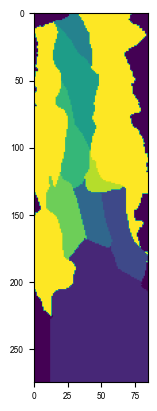

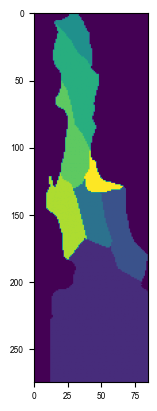

In [17]:
z = np.genfromtxt(os.path.join(ml.model_ws, 'model_arrays', 'zonation_3.csv'), delimiter = ' ')

zotther = z.copy()
zotther[zotther>8] = 0

zones = {i:zotther  for i in range(7) }
zones[0] = z
plt.imshow(zones[0])
plt.figure()
plt.imshow(zones[1])

In [18]:
pp_cells = 7
pp_df = pyemu.pp_utils.setup_pilotpoints_grid(ml,
                                prefix_dict=prefix_dict,
                                              ibound = zones,
                                              use_ibound_zones = False,
                                every_n_cell=pp_cells,
                                pp_dir=os.path.join(ml.model_ws,'pp2024'),
                                tpl_dir=os.path.join(ml.model_ws,'pp2024'),
                                shapename=os.path.join(ml.model_ws,'pp2024',"pp.shp"))

The ``dataframe`` return has the same info as the shapefile that was written - useful info, right?

In [19]:
pp_df.index = pp_df.parnme
pp_df

print(pp_df.pargp.unique())
pp_df

['hk1' 'ss1' 'sy1' 'vk1' 'fmp_vk' 'drn_k' 'hk2' 'ss2' 'vk2' 'hk3' 'ss3'
 'vk3' 'hk4' 'ss4' 'vk4' 'hk5' 'ss5' 'vk5' 'hk6' 'ss6' 'vk6']


,name,x,y,zone,parval1,k,i,j,parnme,tpl,tpl_filename,pp_filename,pargp,dercom,offset,parchglim,parlbnd,partrans,parubnd,scale
parnme,,,,,,,,,,,,,,,,,,,,
hk1_i:3_j:31_zone:1,pp_0000,6.398138e+06,1.922675e+06,1,1.0,0,3,31,hk1_i:3_j:31_zone:1,~ hk1_i:3_j:31_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat,hk1,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
hk1_i:3_j:38_zone:1,pp_0001,6.401360e+06,1.924043e+06,1,1.0,0,3,38,hk1_i:3_j:38_zone:1,~ hk1_i:3_j:38_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat,hk1,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
hk1_i:3_j:45_zone:1,pp_0002,6.404582e+06,1.925411e+06,1,1.0,0,3,45,hk1_i:3_j:45_zone:1,~ hk1_i:3_j:45_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat,hk1,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
hk1_i:3_j:52_zone:1,pp_0003,6.407804e+06,1.926778e+06,1,1.0,0,3,52,hk1_i:3_j:52_zone:1,~ hk1_i:3_j:52_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat,hk1,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
hk1_i:3_j:59_zone:1,pp_0004,6.411025e+06,1.928146e+06,1,1.0,0,3,59,hk1_i:3_j:59_zone:1,~ hk1_i:3_j:59_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat,hk1,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vk6_i:269_j:52_zone:1,pp_0242,6.459771e+06,1.804351e+06,1,1.0,5,269,52,vk6_i:269_j:52_zone:1,~ vk6_i:269_j:52_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat,vk6,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
vk6_i:269_j:59_zone:1,pp_0243,6.462993e+06,1.805719e+06,1,1.0,5,269,59,vk6_i:269_j:59_zone:1,~ vk6_i:269_j:59_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat,vk6,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0
vk6_i:269_j:66_zone:1,pp_0244,6.466214e+06,1.807086e+06,1,1.0,5,269,66,vk6_i:269_j:66_zone:1,~ vk6_i:269_j:66_zone:1 ~,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat.tpl,C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk6pp.dat,vk6,1,0.0,factor,1.100000e-10,log,1.100000e+10,1.0


# assign values from previous model

In [20]:
def load(folder, var, lay,name):
    arr = np.genfromtxt(os.path.join(folder, f"PARAM_{var}_G1_L{lay}.txt"), skip_header=1)

    x,y = np.indices(arr.shape, dtype = int)
    x = x.reshape((-1,1))
    y = y.reshape((-1,1))
    arr = arr.reshape((-1,1))
    arr = pd.DataFrame(data = np.hstack([x,y,arr]), columns = ['i','j', f"{name}{lay}"])
    arr = arr.set_index(['i','j'])
    return arr


ar = [load(os.path.join(owhm2, 'output'), 'HKR', layer, 'hk') for layer in np.arange(1,7)]
hk = pd.concat(ar, axis = 1,)
ar = [load(os.path.join(owhm2, 'output'), 'VKA', layer, 'vk') for layer in np.arange(1,7)]
vk = pd.concat(ar, axis = 1,)
ar = [load(os.path.join(owhm2, 'output'), 'SS', layer, 'ss') for layer in np.arange(1,7)]
ss = pd.concat(ar, axis = 1,)
sy = [load(os.path.join(owhm2, 'output'), 'Sy', layer, 'sy') for layer in np.arange(1,2)][0]

aq = pd.concat([hk, vk, ss, sy], axis = 1)
aq

hk1       hk2       hk3       hk4       hk5       hk6  \
i     j                                                                  
0.0   0.0        NaN       NaN       NaN       NaN       NaN       NaN   
      1.0        NaN       NaN       NaN       NaN       NaN       NaN   
      2.0        NaN       NaN       NaN       NaN       NaN       NaN   
      3.0        NaN       NaN       NaN       NaN       NaN       NaN   
      4.0        NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
274.0 80.0  0.280418  0.136539  0.086387  0.166266  0.208189  0.374966   
      81.0  0.274534  0.134372  0.087312  0.168524  0.211234  0.368541   
      82.0  0.271046  0.133713  0.089368  0.171673  0.212266  0.365984   
      83.0  0.269349  0.133928  0.091572  0.174604  0.212246  0.365266   
      84.0  0.268961  0.134769  0.093802  0.177246  0.211491  0.365808   

                 vk1       vk2       vk3       vk4       vk5       vk6  \
i     j                                                                  
0.0   0.0        NaN       NaN       NaN       NaN       NaN       NaN   
      1.0        NaN       NaN       NaN       NaN       NaN       NaN   
      2.0        NaN       NaN       NaN       NaN       NaN       NaN   
      3.0        NaN       NaN       NaN       NaN       NaN       NaN   
      4.0        NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
274.0 80.0  5.721848  2.557860  1.304559  5.109834  5.016408  7.147362   
      81.0  5.540394  2.520226  1.300502  5.243968  5.216006  7.100953   
      82.0  5.421901  2.510664  1.331891  5.363845  5.335452  7.076208   
      83.0  5.357804  2.516143  1.373364  5.451186  5.405470  7.068806   
      84.0  5.333973  2.532296  1.420887  5.510248  5.438138  7.074268   

                 ss1       ss2       ss3       ss4       ss5       ss6   sy1  
i     j                                                                       
0.0   0.0        NaN       NaN       NaN       NaN       NaN       NaN   NaN  
      1.0        NaN       NaN       NaN       NaN       NaN       NaN   NaN  
      2.0        NaN       NaN       NaN       NaN       NaN       NaN   NaN  
      3.0        NaN       NaN       NaN       NaN       NaN       NaN   NaN  
      4.0        NaN       NaN       NaN       NaN       NaN       NaN   NaN  
...              ...       ...       ...       ...       ...       ...   ...  
274.0 80.0  0.000085  0.000047  0.000093  0.000418  0.000026  0.000090  0.05  
      81.0  0.000086  0.000048  0.000093  0.000422  0.000026  0.000090  0.05  
      82.0  0.000086  0.000048  0.000094  0.000423  0.000026  0.000090  0.05  
      83.0  0.000086  0.000049  0.000094  0.000424  0.000026  0.000089  0.05  
      84.0  0.000086  0.000049  0.000093  0.000424  0.000027  0.000089  0.05  

[23375 rows x 19 columns]

In [21]:
cols = pp_df.columns

pp_ren = pd.merge(pp_df, aq, on = ['i', 'j'], how = 'left')

for prop in pp_df.pargp.unique():
    if prop in aq.columns:
        c = pp_ren.pargp== prop
        pp_ren.loc[c, 'parval1'] = pp_ren.loc[c, prop]
    else:
        print(f"skipping {prop} bc it's not in loaded arrays")

# set vk to 0.1 for layer 1 and 0.001 for others
pp_ren.loc[pp_ren.pargp.str.startswith('vk'), 'parval1'] = 0.1
pp_ren.loc[pp_ren.pargp=='vk1', 'parval1'] = 0.1


pp_ren = pp_ren.loc[:,cols]



skipping fmp_vk bc it's not in loaded arrays
skipping drn_k bc it's not in loaded arrays


# set bounds to values

In [22]:
import re

def remove_numbers(input_string):
    return re.sub(r'\d+', '', input_string)

pp_ren.pargp.apply(remove_numbers).unique()

array(['hk', 'ss', 'sy', 'vk', 'fmp_vk', 'drn_k'], dtype=object)

In [23]:
bounds = dict(hk = [0.0001, 500],
sy = [0.01, 0.3],
vk = [0.001, .1],
ss = [1E-7, 1E-4],
fmp_vk = [0.0001, 10],
drn_k= [0.0001, 10])
bounds

{'hk': [0.0001, 500],
 'sy': [0.01, 0.3],
 'vk': [0.001, 0.1],
 'ss': [1e-07, 0.0001],
 'fmp_vk': [0.0001, 10],
 'drn_k': [0.0001, 10]}

In [24]:
for n, group in pp_ren.groupby(pp_ren.pargp.apply(remove_numbers)):
    pp_ren.loc[group.index,['parlbnd','parubnd']] = bounds[n]

In [25]:
pp_ren.to_csv('pilot_point_info.csv')

### geostats and kriging
now that we have pilot points setup, we need to solve the kriging equations for each model cell using pilot point locations.  Since we only have a single set of pilot points that we are reusing for several array-based ``modflow`` inputs, we only need to get the kriging factors once

In [26]:
hk_pp = pyemu.pp_utils.pp_file_to_dataframe(os.path.join(ml.model_ws,'pp2024',"hk1pp.dat"))
hk_pp2 = pyemu.pp_utils.pp_file_to_dataframe(os.path.join(ml.model_ws,'pp2024',"hk2pp.dat"))

In [27]:
hk_pp.head()

,name,x,y,zone,parval1
0,pp_0000,6.398138e+06,1.922675e+06,1,1.0
1,pp_0001,6.401360e+06,1.924043e+06,1,1.0
2,pp_0002,6.404582e+06,1.925411e+06,1,1.0
3,pp_0003,6.407804e+06,1.926778e+06,1,1.0
4,pp_0004,6.411025e+06,1.928146e+06,1,1.0


In [28]:
hk_pp2.head()

,name,x,y,zone,parval1
0,pp_0000,6.398138e+06,1.922675e+06,1,1.0
1,pp_0001,6.393062e+06,1.916719e+06,1,1.0
2,pp_0002,6.396284e+06,1.918086e+06,1,1.0
3,pp_0003,6.399506e+06,1.919454e+06,1,1.0
4,pp_0004,6.394430e+06,1.913497e+06,1,1.0


Let's setup a geostatistical structure.  The contribution doesn't matter for pilot point interpolation, but it does matter when we want to form a prior parameter covariance matrix - we will get to that later.  A good rule of thumb is to use an ``a`` value that is three times the pilot point spacing.  Also, since the all of these pilot points will be log transformed, we need to use a log-based geostatistical structure


<Axes: xlabel='distance', ylabel='$\\gamma$'>

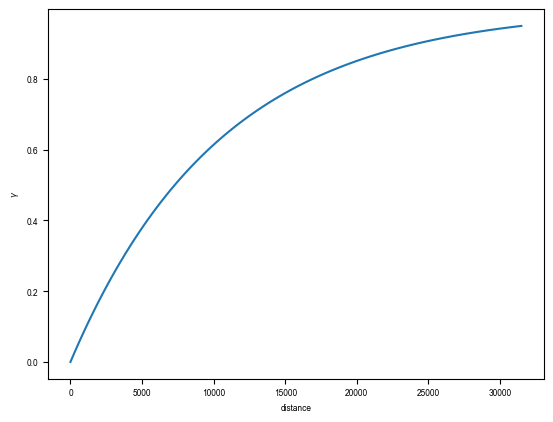

In [29]:
a = pp_cells * ml.dis.delr.array[0] * 3.0
v = pyemu.geostats.ExpVario(contribution=1.0,a=a)
gs = pyemu.geostats.GeoStruct(variograms=v,transform="log")
gs.plot()

This is where things get fun.  First we create an ``OrdinaryKrige`` object


In [30]:
ok = pyemu.geostats.OrdinaryKrige(geostruct=gs,point_data=hk_pp)
ok2 = pyemu.geostats.OrdinaryKrige(geostruct=gs,point_data=hk_pp2)

Now we use a helper function to solve the kriging factors for each active model cell: ``OrdinaryKrige.calc_factors_grid()`` includes all the standard kriging arguments, such as search radius, min and max interpolation points,zone_array, as well as the option to save the kriging variance array 

Note: we need to pass out model's spatial reference information. For flopy this used to be contained in model.sr
      However this has been superseded by model.modelgrid. To avoid reliance on a changing (and not always backward
      compatible) code base the sr method has been abstracted into pyemu.

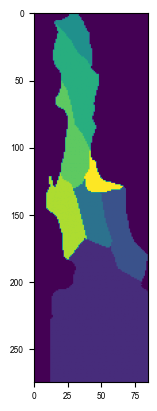

In [31]:
plt.imshow(zones[1])

In [32]:
# sr = pyemu.helpers.SpatialReference.from_namfile(os.path.join(ml.model_ws, ml.namefile),
#                                                  delr=ml.dis.delr, delc=ml.dis.delc)
ok.calc_factors_grid(sr, 
                     # zone_array=zones[0],
                     var_filename=os.path.join(ml.model_ws,'pp2024',"layer1_var.dat"))
print('\nstarting layer 2\n')
ok2.calc_factors_grid(sr, 
                     # zone_array=zones[1],
                     var_filename=os.path.join(ml.model_ws,'pp2024',"layer2_var.dat"))
print('done')

starting interp point loop for 23375 points
took 62.550572 seconds

starting layer 2

starting interp point loop for 23375 points
took 62.818117 seconds
done


Ok, we know that this function is slow for bigly models, but it is super convienent and allows a lot of flexibility.  So, once we have calculated the kriging factors for each active model cell, we need to write this to a factors file

In [33]:
ok.to_grid_factors_file(os.path.join(ml.model_ws,'pp2024', "pp.fac"))
ok2.to_grid_factors_file(os.path.join(ml.model_ws,'pp2024', "pp2.fac"))

# this has been added to helpers for model runs

In [34]:
import importlib
importlib.reload(forward_run)

loading forward_run.py from C:\GSP\sv\model\update_2024\scripts\local_copy


C:\GSP\sv\model\update_2024\scripts\local_copy\forward_run.py:146: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\local_copy\forward_run.py:317: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\local_copy\forward_run.py:347: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\local_copy\forward_run.py:571: DeprecationWarning: invalid escape sequence \s
C:\GSP\sv\model\update_2024\scripts\local_copy\forward_run.py:610: DeprecationWarning: invalid escape sequence \s


<module 'forward_run' from 'C:\\GSP\\sv\\model\\update_2024\\scripts\\local_copy\\forward_run.py'>

In [35]:
# def write_pilot_point(layer, prop, model_ws):
#     if layer !=1:
#         factors_file = os.path.join(model_ws,'pp2024', "pp.fac")
#     else:
#         factors_file = os.path.join(model_ws,'pp2024', "pp2.fac")

#     out_file = os.path.join(model_ws, 'pp2024_out',f"{prop}.txt")
    
#     pp_file =  os.path.join(model_ws, 'pp2024',f"{prop}pp.dat")
#     assert os.path.exists(pp_file), f"pp_file does not exist {pp_file}"
#     print(f"pp_file = {pp_file}, factors_file={factors_file}, out_file={out_file}")
    
#     hk_arr = pyemu.geostats.fac2real(pp_file, factors_file=factors_file, out_file=out_file)

# def write_all_pp(model_ws):
#     prefix_dict= {0:["hk1","sy1","vk1"],
#                  1:["hk2","ss2","vk2",'fmp_vk', 'drn_k'],
#                  2:["hk3","ss3","vk3"],
#                  3:["hk4","ss4","vk4"],
#                  4:["hk5","ss5","vk5"],
#                  5:["hk6","ss6","vk6"]}
#     for lay in prefix_dict.keys():
#         for par in prefix_dict[lay]:
#             write_pilot_point(lay, par, model_ws)

forward_run.write_all_pp(ml.model_ws)


# pp_file = 'hkpp1.dat'

# out_folder = ''
# out_file='freyberg6.npf_k_layer1.txt'

# pp_file = 'rchpp.dat'
# hk_arr = pyemu.geostats.fac2real(pp_file, factors_file=pp_file+'.fac',out_file='rch0_fac.txt')

C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac
pp_file = C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\hk1pp.dat, factors_file=C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac, out_file=None
C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac
pp_file = C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\ss1pp.dat, factors_file=C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac, out_file=None
C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac
pp_file = C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\sy1pp.dat, factors_file=C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac, out_file=None
C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac
pp_file = C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\vk1pp.dat, factors_file=C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac, out_file=None
C:\GSP\sv\model\update_2024\scripts\local_copy\pp2024\pp.fac
pp_file = C:\GSP\sv\model\update_2024\s

Let's check out that kriging variance array....


map projection is: 2226


C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
C:\rich_py\conda_scripts\conda_scripts\rich_gis.py:412: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\

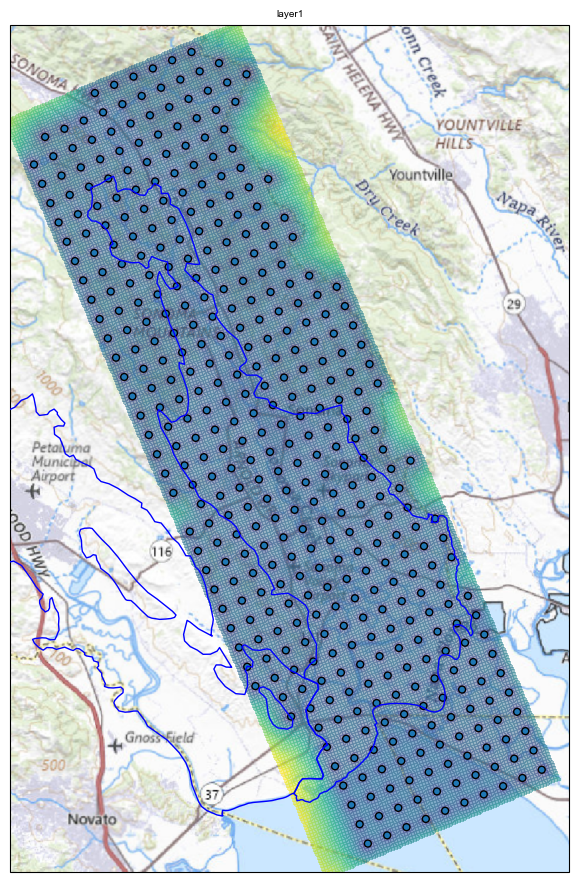

In [36]:
var_arr = np.ma.masked_invalid(np.loadtxt(os.path.join(ml.model_ws,'pp2024',"layer1_var.dat")))
fig = plt.figure(figsize=(8.5,11))
mm = conda_scripts.make_map.make_map('layer1')
ax = mm.plotloc(fig, locname = 'SON_MOD')
ax.pcolormesh(sr.xcentergrid,sr.ycentergrid,var_arr,alpha=0.5)
ax.scatter(hk_pp.x, hk_pp.y,marker='o', c = hk_pp.zone,s=25, cmap = 'tab10', ec = 'k')
plt.savefig('pilot_points_lay1.png')

In [37]:
hk_pp2

,name,x,y,zone,parval1
0,pp_0000,6.398138e+06,1.922675e+06,1,1.0
1,pp_0001,6.393062e+06,1.916719e+06,1,1.0
2,pp_0002,6.396284e+06,1.918086e+06,1,1.0
3,pp_0003,6.399506e+06,1.919454e+06,1,1.0
4,pp_0004,6.394430e+06,1.913497e+06,1,1.0
...,...,...,...,...,...
242,pp_0242,6.459771e+06,1.804351e+06,1,1.0
243,pp_0243,6.462993e+06,1.805719e+06,1,1.0
244,pp_0244,6.466214e+06,1.807086e+06,1,1.0
245,pp_0245,6.469436e+06,1.808454e+06,1,1.0


map projection is: 2226


C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
C:\rich_py\conda_scripts\conda_scripts\rich_gis.py:412: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\pyproj\crs\

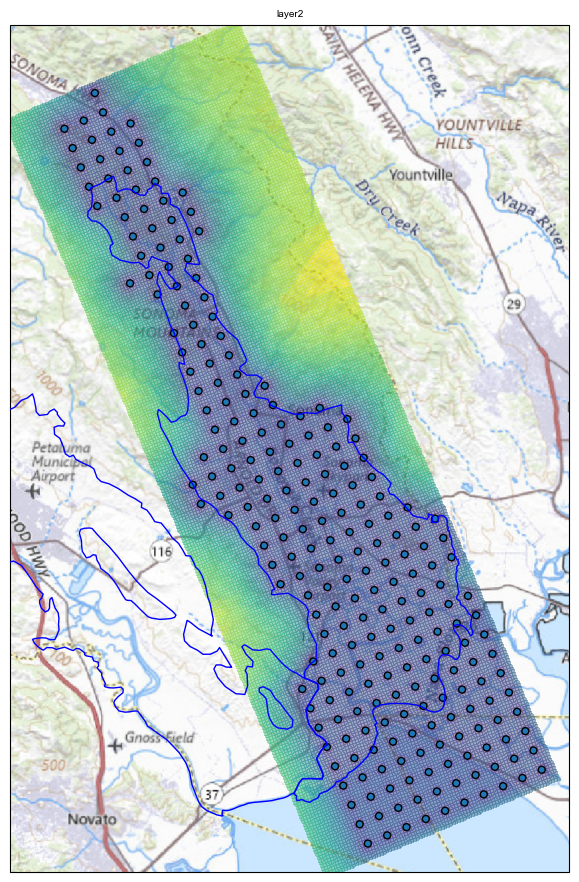

In [38]:
var_arr = np.ma.masked_invalid(np.loadtxt(os.path.join(ml.model_ws,'pp2024',"layer2_var.dat")))
fig = plt.figure(figsize=(8.5,11))
mm = conda_scripts.make_map.make_map('layer2')
ax = mm.plotloc(fig, locname = 'SON_MOD')
ax.pcolormesh(sr.xcentergrid,sr.ycentergrid,var_arr,alpha=0.5)
ax.scatter(hk_pp2.x, hk_pp2.y,marker='o', c = hk_pp2.zone,s=25, cmap = 'tab10', ec = 'k')
plt.savefig('pilot_points_lay2.png')

In [39]:
os.getcwd()

'C:\\GSP\\sv\\model\\update_2024\\scripts\\local_copy'

# add zone multipliers

In [40]:
mult_path = os.path.join('zone_pest_mult')

In [41]:
if not os.path.exists(mult_path):
    os.makedirs(mult_path, exist_ok=True)

In [42]:
zdict = forward_run.get_prefix_dict_for_pilot_points()

C:\Users\arich\AppData\Local\Temp\1\ipykernel_9560\677914706.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 'Bay' 'Bay' 'Bay']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.


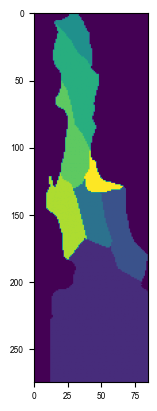

In [51]:
z = np.genfromtxt(os.path.join(ml.model_ws, 'model_arrays', 'zonation_3.csv'), delimiter = ' ')

zotther = z.copy()
zotther[zotther>8] = 0

zones = {i:zotther  for i in range(7) }
zones[0] = z
plt.imshow(zones[1])

z = conda_scripts.arich_functions.array2rc(zones[1],'zone').astype({'zone':int})

aliases = {1: 'Bay', 2: 'EastSide', 3: 'SouthCent', 4: 'Kenwood', 5: 'VOM', 6: 'AguaCal',7:'WestSide',8:'CitySon',9:'Highlands'}
z.loc[:,'zone'] =z.loc[:,'zone'].replace(aliases)
z = z.query("zone!=0")

geoms = conda_scripts.arich_functions.get_model_shp(ml.modelgrid, 2226).drop(columns = ['row','col'])

z = gpd.GeoDataFrame(pd.merge(z, geoms, on = ['i','j']))
zplot = z.dissolve('zone').reset_index()

In [52]:
zz = [z for _,z in zones.items()]
zz = np.stack(zz)
zz = zz[:6,:,:]
zz[ml.bas6.ibound.array==0] = np.nan
zz = np.array(zz, dtype = int)
zz.shape

(6, 275, 85)

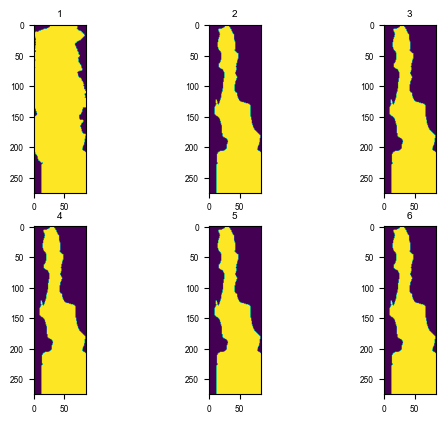

In [53]:
fig, ax = plt.subplots(2,3)
ax = ax.ravel()

for i in range(6):

    ax[i].imshow(zz[i])
    ax[i].set_title(i+1)

In [54]:
prefix = forward_run.get_prefix_dict_for_pilot_points()
prefix

{0: ['hk1', 'ss1', 'sy1', 'vk1', 'fmp_vk', 'drn_k'],
 1: ['hk2', 'ss2', 'vk2'],
 2: ['hk3', 'ss3', 'vk3'],
 3: ['hk4', 'ss4', 'vk4'],
 4: ['hk5', 'ss5', 'vk5'],
 5: ['hk6', 'ss6', 'vk6']}

In [55]:
os.getcwd()

'C:\\GSP\\sv\\model\\update_2024\\scripts\\local_copy'

# write array files while adding parameter locations for paremeter values


In [56]:
len('zonemult_hk2_Highlands')

22

In [57]:

for lay, vals in prefix.items():
    for val in vals:
        # string_array = np.zeros(z.shape, dtype ='U20')
        string_array = np.zeros(zz[i].shape, dtype ='U30')
        string_array[:,:] = '1e30'
        for zonenum, zonename in aliases.items():
            
            c_ = zz[lay]==zonenum
            fff = "zonemult_{:}_{:}".format(val, zonename)
            string_array[c_] = f"~{fff:20s}~"
            print(lay, zonenum, val, zonename, c_.ravel().sum())
            # print(np.unique(base.ravel()))
            # # Use np.vectorize to apply the dictionary mapping
            # string_array = np.vectorize(lambda x: '' if x is None else aliases.get(x))(base)
        file = os.path.join(mult_path, f'zonemult_{val}.csv.tpl')
        
        with open(file,'w') as wrt:
            wrt.write('ptf ~\n')
        with open(file,'a') as wrt:
            np.savetxt(wrt, string_array, fmt = '%s', delimiter=',')


0 1 hk1 Bay 6246
0 2 hk1 EastSide 1192
0 3 hk1 SouthCent 745
0 4 hk1 Kenwood 488
0 5 hk1 VOM 1466
0 6 hk1 AguaCal 925
0 7 hk1 WestSide 1002
0 8 hk1 CitySon 316
0 9 hk1 Highlands 8509
0 1 ss1 Bay 6246
0 2 ss1 EastSide 1192
0 3 ss1 SouthCent 745
0 4 ss1 Kenwood 488
0 5 ss1 VOM 1466
0 6 ss1 AguaCal 925
0 7 ss1 WestSide 1002
0 8 ss1 CitySon 316
0 9 ss1 Highlands 8509
0 1 sy1 Bay 6246
0 2 sy1 EastSide 1192
0 3 sy1 SouthCent 745
0 4 sy1 Kenwood 488
0 5 sy1 VOM 1466
0 6 sy1 AguaCal 925
0 7 sy1 WestSide 1002
0 8 sy1 CitySon 316
0 9 sy1 Highlands 8509
0 1 vk1 Bay 6246
0 2 vk1 EastSide 1192
0 3 vk1 SouthCent 745
0 4 vk1 Kenwood 488
0 5 vk1 VOM 1466
0 6 vk1 AguaCal 925
0 7 vk1 WestSide 1002
0 8 vk1 CitySon 316
0 9 vk1 Highlands 8509
0 1 fmp_vk Bay 6246
0 2 fmp_vk EastSide 1192
0 3 fmp_vk SouthCent 745
0 4 fmp_vk Kenwood 488
0 5 fmp_vk VOM 1466
0 6 fmp_vk AguaCal 925
0 7 fmp_vk WestSide 1002
0 8 fmp_vk CitySon 316
0 9 fmp_vk Highlands 8509
0 1 drn_k Bay 6246
0 2 drn_k EastSide 1192
0 3 drn_k South

# create layer multiplier

In [58]:

for lay, vals in prefix.items():
    for val in vals:       
        
        string_array = np.zeros(zz[lay].shape, dtype ='U30')
        string_array[:,:] = '1e30'

        c_ = zz[lay]>0
        
        fff = "laymult_{:}".format(val)
        string_array[c_] = f"~{fff:20s}~"

        file = os.path.join(mult_path, f'laymult_{val}.csv.tpl')
        
        with open(file,'w') as wrt:
            wrt.write('ptf ~\n')
        with open(file,'a') as wrt:
            np.savetxt(wrt, string_array, fmt = '%s', delimiter=',')